# BREAST CANCER DETECTION USING ADABOOST

## Import necessary libraries

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [6]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns=['ID','Diagnosis']+[f'Feature_{i}' for i in range(1,31)]
data=pd.read_csv(url,header=None,names=columns)

data

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Display the first 5 and last 5 rows, shape, and basic info of the dataset

In [8]:
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
 data.tail() 

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
 {data.shape}

{(569, 32)}

In [11]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

In [12]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Check for duplicate rows

In [15]:
# Check for duplicate rows
num_total_rows = len(data) 
num_duplicate_rows = data.duplicated().sum() 
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100 
print(f"Number of Rows with Duplicates: {num_duplicate_rows}") 
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


## Count unique values for each column

In [17]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


## Drop non-numeric columns (e.g., 'id')

In [19]:
data.drop('ID', axis=1, inplace=True)
print(data.columns)

Index(['Diagnosis', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30'],
      dtype='object')


## Check for Missing Values

In [21]:
# Check for Missing Values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


## Handle Missing Values: Filling missing values only in numeric columns

In [23]:
# Handle Missing Values: Filling missing values with the mean for numeric columns only
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

## Visualize the count of Benign vs Malignant cases before splitting, outlier removal and scaling

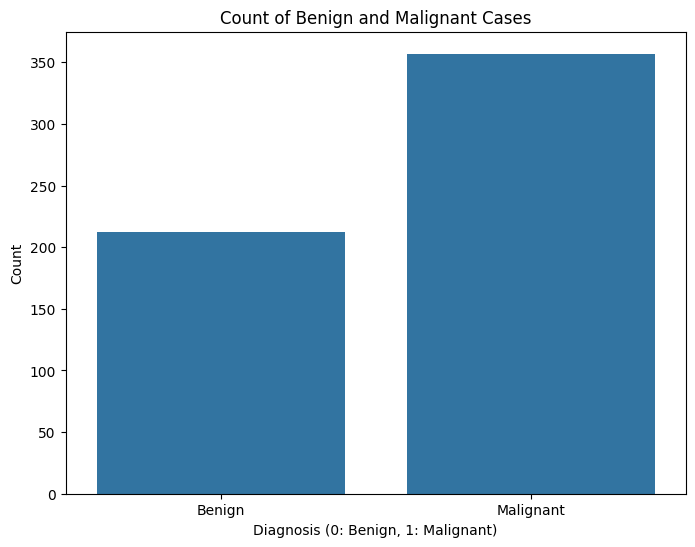

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant Cases')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])  # Set x-tick labels
plt.show()

Encode Labels: Encoding 'diagnosis' column (1 for Malignant, 0 for Benign)

## Splitting Data

In [28]:
X = data.drop('Diagnosis', axis=1)  # Features
y = data['Diagnosis']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (455, 30)
Testing features shape: (114, 30)
Training labels shape: (455,)
Testing labels shape: (114,)


## Outlier Detection: Using IQR

In [30]:
def detect_outliers_iqr(df, columns=None):
    """
    Detects outliers in a dataframe using the IQR method.

    Parameters:
    - df (pd.DataFrame): The dataset to process.
    - columns (list, optional): List of specific columns to check for outliers. 
                                If None, checks all numeric columns.

    Returns:
    - pd.DataFrame: Rows from the dataframe that are identified as outliers.
    """
    outliers = pd.DataFrame()
    
    # If no specific columns are provided, select all numeric columns
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers in the current column
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column], axis=0)

    return outliers.drop_duplicates()



In [31]:
# Detect outliers
outliers = detect_outliers_iqr(data, columns=X.columns)
print(f"Number of outliers detected: {len(outliers)}")
# Filter out rows identified as outliers
outliers = outliers[outliers.index.isin(data.index)]  # Ensure indices match
data = data.drop(outliers.index, axis=0)             # Drop outlier rows

# Print the cleaned dataset
print(f"Number of rows after removing outliers: {data.shape[0]}")


Number of outliers detected: 171
Number of rows after removing outliers: 398


In [32]:
print(data)

    Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
6           M      18.25      19.98     119.60     1040.0    0.09463   
7           M      13.71      20.83      90.20      577.9    0.11890   
10          M      16.02      23.24     102.70      797.8    0.08206   
11          M      15.78      17.89     103.60      781.0    0.09710   
13          M      15.85      23.95     103.70      782.7    0.08401   
..        ...        ...        ...        ...        ...        ...   
554         B      12.88      28.92      82.50      514.3    0.08123   
555         B      10.29      27.61      65.67      321.4    0.09030   
558         B      14.59      22.68      96.39      657.1    0.08473   
560         B      14.05      27.15      91.38      600.4    0.09929   
566         M      16.60      28.08     108.30      858.1    0.08455   

     Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
6      0.10900    0.11270    0.07400     0.1794  ...   

## Scaling Features

In [34]:
# Scale the features
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler (do not fit again on test data)
X_test_scaled = scaler.transform(X_test)


### Display the first few rows of the scaled features

In [36]:
# Check the first few rows of the scaled data (optional)
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.440753  -0.435319  -1.362085  -1.139118   0.780573   0.718921   
1   1.974096   1.733026   2.091672   1.851973   1.319843   3.426275   
2  -1.399982  -1.249622  -1.345209  -1.109785  -1.332645  -0.307355   
3  -0.981797   1.416222  -0.982587  -0.866944   0.059390  -0.596788   
4  -1.117700  -1.010259  -1.125002  -0.965942   1.269511  -0.439002   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0   2.823135  -0.119150   1.092662    2.458173  ...   -1.232861   -0.476309   
1   2.013112   2.665032   2.127004    1.558396  ...    2.173314    1.311279   
2  -0.365558  -0.696502   1.930333    0.954379  ...   -1.295284   -1.040811   
3  -0.820203  -0.845115   0.313264    0.074041  ...   -0.829197    1.593530   
4  -0.983341  -0.930600   3.394436    0.950213  ...   -1.085129   -1.334616   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0   -1.247920   -0.97

### Visualize the count of Benign vs Malignant cases after splitting, outlier removal and scaling

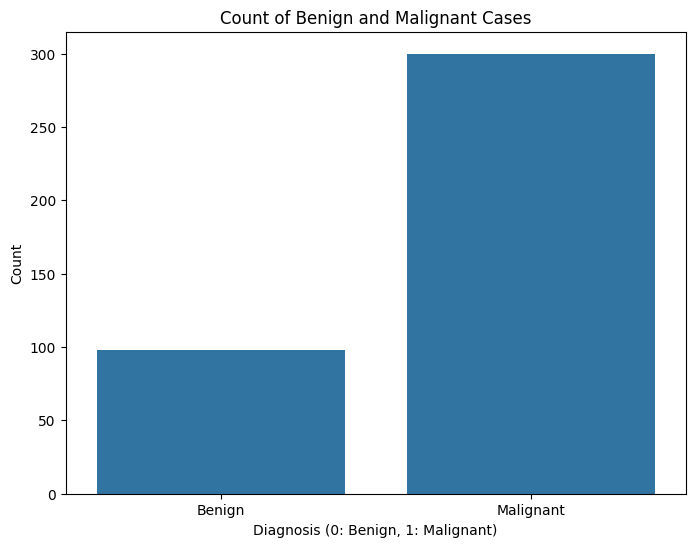

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant Cases')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])  # Set x-tick labels
plt.show()

Retrieves the 25th percentile (Q1) for each feature. Retrieves the 75th percentile (Q3) for each feature. IQR is the difference between the third quartile (Q3) and first quartile (Q1).


## Smote

In [41]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [42]:
# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
Diagnosis
B    286
M    286
Name: count, dtype: int64


## Implementing Adaboost Algorithm

In [44]:
# Define the AdaBoost model with a DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)


### Fit the AdaBoost classifier on the training data and Make predictions on the test set

In [46]:
# Train the model on the SMOTE-augmented training data
adaboost.fit(X_train_smote, y_train_smote)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [47]:
y_pred = adaboost.predict(X_test_scaled)

## Evaluating Model Performance

### Accuracy

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9649


### Precision

In [52]:
precision = precision_score(y_test, y_pred, pos_label='M')  # 'M' for malignant
print(f"Precision (Malignant): {precision:.4f}")

Precision (Malignant): 0.9535


### Recall

In [54]:
recall = recall_score(y_test, y_pred, pos_label='M')      # 'M' for malignant
print(f"Recall (Malignant): {recall:.4f}")

Recall (Malignant): 0.9535


### F1-score

In [56]:
f1 = f1_score(y_test, y_pred, pos_label='M')              # 'M' for malignant
print(f"F1 Score (Malignant): {f1:.4f}")

F1 Score (Malignant): 0.9535


### Confusion Matrix

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[69  2]
 [ 2 41]]


## Hyperparameter Tuning 

### Define the Hyperparameter Grid:

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],  # The number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1.0]  # Learning rate
}


### GridSearchCV:

In [63]:
# Define the AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit the grid search
grid_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters found by Grid Search:", best_params)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best hyperparameters found by Grid Search: {'learning_rate': 1.0, 'n_estimators': 200}


### Re-train the Model Using Best Hyperparameters:

In [65]:
# Re-train the AdaBoost model with the best parameters
best_adaboost = grid_search.best_estimator_

# Fit the best model on the SMOTE-augmented training data
best_adaboost.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = best_adaboost.predict(X_test_scaled)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Evaluate the Tuned Model:

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='M')
recall = recall_score(y_test, y_pred, average='binary', pos_label='M')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9649
Precision: 0.9535
Recall: 0.9535
F1 Score: 0.9535
Confusion Matrix:
[[69  2]
 [ 2 41]]


### Plot the Confusion Matrix:

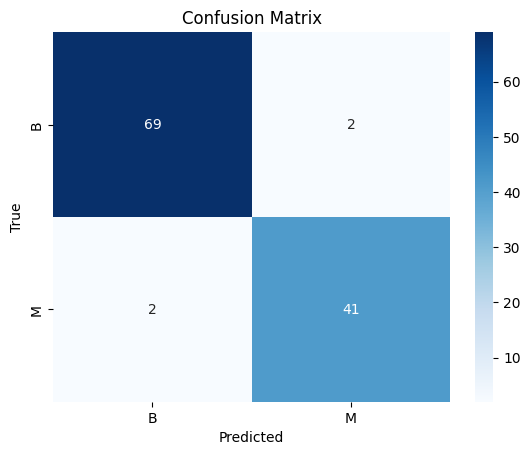

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
